In [1]:
from timeit import timeit
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit, prange
import math
import time

In [2]:
@njit(parallel = True)
def select(num, dim):
    """
    Вычисляет количество точек, попавших в 1/8 единичного круга
    
    Параметры
    ----------
    selected (int) - счётчик количества попавших точек
    len (float) длина радиус-вектора каждой точки
    
    Возвращаемое значение
    ----------
    selected (int) - количество попавших точек в 1/8 единичного круга
    """
    selected = 0
    for i in prange(num):
        v = np.random.random(dim)
        len = 0
        for j in v:
            len += j ** 2
        len = len ** 0.5
        if len <= 1:
            selected += 1
        else:
            pass
    return selected

In [3]:
def get_all_data():
    """
    Считает объём шара и нужное количество точек для каждого измерения
    
    Параметры
    ----------
    num (int) - шаг, с которым будем подбирать нужное количество точек
    dimension (список python) - список всех размерностей
    vs (список python) - массив всех объёмов для каждой размерности
    dots (список python) - массив количества нужных точек для каждой размерности
    stop (boolean) - индикатор, когда подобрали необходимое количество точек
    volume_n (float) - начальный объём
    volume_m (float) - добавочный объём
    vs1 (int) - количество точек, попавших в заданную область для начального объёма
    vs2 (int) - количество точек, попавших в заданную область для добавочного объёма
    volume_nm (float) - суммарный объём
    d (float) - модуль разности объёмов
    s (float) - точность (параметр, который в дальнейшем будет учитываться для оценки погрешности)
    
    Возвращаемое значение
    ----------
    vs (список python) - массив всех объёмов для каждой размерности
    dots (список python) - массив количества нужных точек для каждой размерности
    """
    num = 1000000
    dimension = [i for i in range(1, 17)]
    vs = []
    dots = []
    
    for dim in dimension:
        stop = False
        start_t = time.time()
        while not stop:
            for i in range(1, 1000):
                if i == 1:
                    vs1 = select(i*num, dim)
                    volume_n = (2 ** dim) * vs1 / (i*num)
                    vs2 = select(num, dim)
                    volume_m = (2 ** dim) * vs2 / num
                    volume_nm = (i*num*volume_n + num*volume_m) / ((i+1)*num)
                else:
                    volume_n = volume_nm
                    vs2 = select(num, dim)
                    volume_m = (2 ** dim) * vs2 / num
                    volume_nm = (i*num*volume_n + num*volume_m) / ((i+1)*num)
                d = abs(volume_nm - volume_n)
                s = 1e-6 + volume_nm * 1e-6
                if d / s < 1:
                    stop = True
                    vs.append(volume_nm)
                    dots.append(i*num)
                    print("dim: {}, time: {} seconds, num of dots: {}".format(dim, round(time.time() - start_t, 4), i*num))
                    break
                else:
                    pass
    return vs, dots

In [4]:
vs, dots = get_all_data()

dim: 1, time: 3.5604 seconds, num of dots: 1000000
dim: 2, time: 0.1107 seconds, num of dots: 35000000
dim: 3, time: 0.1316 seconds, num of dots: 30000000
dim: 4, time: 0.2703 seconds, num of dots: 55000000
dim: 5, time: 0.4328 seconds, num of dots: 71000000
dim: 6, time: 0.5376 seconds, num of dots: 77000000
dim: 7, time: 0.7281 seconds, num of dots: 85000000
dim: 8, time: 0.5206 seconds, num of dots: 50000000
dim: 9, time: 1.2267 seconds, num of dots: 104000000
dim: 10, time: 2.1283 seconds, num of dots: 175000000
dim: 11, time: 0.1396 seconds, num of dots: 10000000
dim: 12, time: 1.495 seconds, num of dots: 100000000
dim: 13, time: 11.0036 seconds, num of dots: 678000000
dim: 14, time: 3.38 seconds, num of dots: 198000000
dim: 15, time: 0.1626 seconds, num of dots: 7000000
dim: 16, time: 44.7154 seconds, num of dots: 14000000


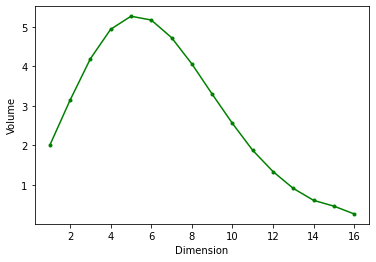

In [5]:
plt.clf()
plt.plot([i for i in range(1, 17)], vs, '.-g')
plt.ylabel('Volume',rotation=90)
plt.xlabel('Dimension',rotation=0)
plt.show()

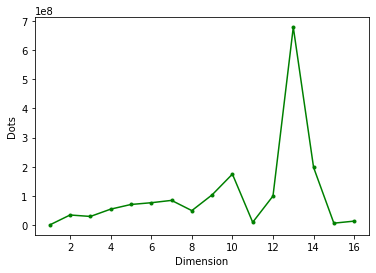

In [6]:
plt.clf()
plt.plot([i for i in range(1, 17)], dots, '.-g')
plt.ylabel('Dots',rotation=90)
plt.xlabel('Dimension',rotation=0)
plt.show()

In [7]:
truev = [2, math.pi, 4 * math.pi / 3, math.pi ** 2 / 2, 8 * math.pi ** 2 / 15, math.pi ** 3 / 6, 16 * math.pi ** 3 / 105, math.pi ** 4 / 24, 32 * math.pi ** 4 / 945, math.pi ** 5 / 120, 64 * math.pi ** 5 / 10395, math.pi ** 6 / 720, 128 * math.pi ** 6 / 135135, math.pi ** 7 / 5040, 15 * math.pi ** 7 / 118771]
for dim in range(15):
    print("Dimension: {}, difference: {}".format(dim + 1, round(abs(truev[dim] - vs[dim]), 4)))

Dimension: 1, difference: 0.0
Dimension: 2, difference: 0.0002
Dimension: 3, difference: 0.0006
Dimension: 4, difference: 0.0009
Dimension: 5, difference: 0.0018
Dimension: 6, difference: 0.0024
Dimension: 7, difference: 0.0001
Dimension: 8, difference: 0.0016
Dimension: 9, difference: 0.0016
Dimension: 10, difference: 0.0044
Dimension: 11, difference: 0.0122
Dimension: 12, difference: 0.0
Dimension: 13, difference: 0.0025
Dimension: 14, difference: 0.0067
Dimension: 15, difference: 0.0773
